In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv(r"train.csv")
df_test = pd.read_csv(r"test.csv")

In [4]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(784**0.5)

28.0


In [6]:
df_train.shape

(42000, 785)

In [3]:
y_train = df_train['label'].values
X_train = df_train.loc[:, df_train.columns != 'label'].values
X_test = df_test.loc[:].values

In [8]:
X_train.shape

(42000, 784)

In [9]:
y_train.shape

(42000,)

In [10]:
X_test.shape

(28000, 784)

## Data Visualization 

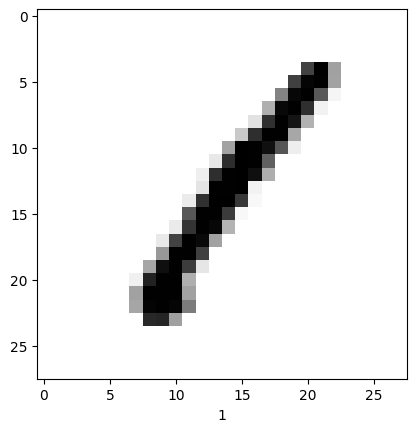

In [4]:
random_index = 0
random_image = X_train[random_index]
random_image_reshaped = random_image.reshape(28, 28)

plt.imshow(random_image_reshaped, cmap = plt.cm.binary)
plt.grid(False)
plt.xlabel(y_train[random_index])
plt.show()

# Data preprocessing

In [15]:
#X_train.iloc[1].values

In [5]:
X_train_rescaled = X_train / 255.0
X_test_rescaled = X_test / 255.0

# Data Spliting

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train_rescaled, y_train, test_size = 0.20, random_state = 55)

print(f'No of training images : {len(X_train)}')
print(f'No of validation images : {len(X_val)}')

No of training images : 33600
No of validation images : 8400


# Model Building

### 1. Neural Network

In [8]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [9]:
NN_model_1 = Sequential([
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [10]:
NN_model_1.compile(optimizer = tf.compat.v1.train.AdamOptimizer(),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics = ['accuracy'])

In [11]:
NN_model_1.fit(X_train, y_train, epochs = 20, validation_data= [X_val, y_val])

Epoch 1/20


1050/1050 [==============================] - 5s 3ms/step - loss: 0.4953 - accuracy: 0.8549 - val_loss: 0.2669 - val_accuracy: 0.9195
Epoch 2/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2174 - accuracy: 0.9365 - val_loss: 0.1889 - val_accuracy: 0.9462
Epoch 3/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1694 - accuracy: 0.9502 - val_loss: 0.1894 - val_accuracy: 0.9433
Epoch 4/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1416 - accuracy: 0.9583 - val_loss: 0.1848 - val_accuracy: 0.9445
Epoch 5/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1223 - accuracy: 0.9633 - val_loss: 0.1518 - val_accuracy: 0.9561
Epoch 6/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1083 - accuracy: 0.9670 - val_loss: 0.1497 - val_accuracy: 0.9580
Epoch 7/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0950 - accuracy: 0.9713 - val_loss: 0.1466 - val_accurac

In [24]:
#NN_model_1.evaluate(X_val, y_val)

In [19]:
NN_model_2 = Sequential([
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'linear')
])

NN_model_2.compile(optimizer = tf.compat.v1.train.AdamOptimizer(),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                metrics = ['accuracy'])

In [20]:
NN_model_2.fit(X_train, y_train, epochs = 10, validation_data = [X_val, y_val])

Epoch 1/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3759 - accuracy: 0.8922 - val_loss: 0.1926 - val_accuracy: 0.9439
Epoch 2/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1628 - accuracy: 0.9521 - val_loss: 0.1475 - val_accuracy: 0.9574
Epoch 3/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1166 - accuracy: 0.9638 - val_loss: 0.1296 - val_accuracy: 0.9627
Epoch 4/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0907 - accuracy: 0.9724 - val_loss: 0.1119 - val_accuracy: 0.9664
Epoch 5/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0748 - accuracy: 0.9769 - val_loss: 0.1187 - val_accuracy: 0.9650
Epoch 6/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0611 - accuracy: 0.9810 - val_loss: 0.1139 - val_accuracy: 0.9674
Epoch 7/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0528 - accuracy: 0.9838 - val_loss: 0.1115 - val_accuracy:

In [28]:
#NN_model_2.evaluate(X_val, y_val)

In [21]:
NN_model_3 = Sequential([
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(10, activation = 'linear')
])

NN_model_3.compile(optimizer = tf.compat.v1.train.AdamOptimizer(),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                metrics = ['accuracy'])

In [22]:
NN_model_3.fit(X_train, y_train, epochs = 10, validation_data = [X_val, y_val])

Epoch 1/10
1050/1050 [==============================] - 5s 4ms/step - loss: 0.4240 - accuracy: 0.8717 - val_loss: 0.2151 - val_accuracy: 0.9386
Epoch 2/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1801 - accuracy: 0.9463 - val_loss: 0.1537 - val_accuracy: 0.9561
Epoch 3/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1338 - accuracy: 0.9613 - val_loss: 0.1536 - val_accuracy: 0.9536
Epoch 4/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1077 - accuracy: 0.9676 - val_loss: 0.1258 - val_accuracy: 0.9626
Epoch 5/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0872 - accuracy: 0.9736 - val_loss: 0.1243 - val_accuracy: 0.9631
Epoch 6/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0714 - accuracy: 0.9778 - val_loss: 0.1197 - val_accuracy: 0.9633
Epoch 7/10
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0632 - accuracy: 0.9793 - val_loss: 0.1158 - val_accuracy:

In [32]:
#NN_model_3.evaluate(X_val, y_val)

# predictions

In [23]:
predictions_1 = NN_model_1.predict(X_test)

875/875 [==============================] - 2s 2ms/step


In [27]:
np.argmax(predictions_1[0])

2

In [31]:
predicted_digits_1 = [np.argmax(prediction) for prediction in predictions_1]

In [32]:
predicted_digits_1

[2,
 0,
 9,
 9,
 3,
 7,
 0,
 3,
 0,
 3,
 5,
 7,
 4,
 0,
 4,
 5,
 3,
 1,
 9,
 0,
 9,
 1,
 1,
 5,
 7,
 4,
 2,
 7,
 4,
 7,
 7,
 5,
 4,
 2,
 6,
 2,
 5,
 5,
 1,
 6,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 2,
 6,
 7,
 6,
 8,
 8,
 3,
 8,
 2,
 1,
 2,
 2,
 0,
 4,
 1,
 7,
 0,
 0,
 0,
 1,
 9,
 0,
 1,
 6,
 5,
 8,
 8,
 2,
 8,
 9,
 9,
 2,
 3,
 5,
 9,
 1,
 0,
 9,
 2,
 4,
 3,
 6,
 7,
 2,
 0,
 6,
 6,
 1,
 4,
 3,
 9,
 7,
 4,
 0,
 9,
 2,
 0,
 7,
 3,
 0,
 5,
 0,
 8,
 0,
 0,
 4,
 7,
 1,
 7,
 1,
 1,
 8,
 3,
 3,
 7,
 2,
 8,
 6,
 3,
 8,
 7,
 8,
 4,
 3,
 5,
 6,
 0,
 0,
 0,
 3,
 1,
 3,
 0,
 6,
 3,
 4,
 5,
 5,
 8,
 7,
 7,
 2,
 8,
 8,
 3,
 5,
 6,
 5,
 3,
 7,
 3,
 7,
 8,
 3,
 0,
 4,
 5,
 1,
 2,
 7,
 6,
 3,
 0,
 2,
 7,
 8,
 6,
 1,
 3,
 7,
 2,
 1,
 2,
 4,
 8,
 5,
 2,
 4,
 9,
 2,
 1,
 6,
 0,
 6,
 1,
 4,
 9,
 6,
 0,
 9,
 7,
 6,
 9,
 1,
 9,
 0,
 9,
 9,
 0,
 8,
 4,
 6,
 2,
 0,
 9,
 3,
 6,
 8,
 2,
 1,
 6,
 3,
 4,
 2,
 3,
 1,
 2,
 2,
 0,
 4,
 6,
 1,
 0,
 0,
 4,
 9,
 1,
 7,
 3,
 2,
 3,
 8,
 6,
 8,
 6,
 2,
 8,
 5,
 5,
 4,
 8,
 3,
 8,


In [30]:
k = pd.Series(range(1, len(X_test) + 1))

In [33]:
output_1 = pd.DataFrame({'ImageId': k, 'Label': predicted_digits_1})
#output.to_csv(r'C:\Users\s6814\OneDrive\Desktop\Digit_classifier.csv', index=False)

In [35]:
output_1.shape

(28000, 2)

In [36]:
output_1.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [38]:
#output.to_csv(r'C:\Users\s6814\OneDrive\Desktop\Digit_classifier_1.csv', index=False)

In [39]:
#predictions_2 = NN_model_2.predict(X_test)
#predicted_digits_2 = [np.argmax(prediction) for prediction in predictions_2]
#output = pd.DataFrame({'ImageId': k, 'Label': predicted_digits_2})
#output.to_csv(r'C:\Users\s6814\OneDrive\Desktop\Digit_classifier_2.csv', index=False)

In [12]:
val_pred = NN_model_1.predict(X_val)
val_pred_digits = [np.argmax(prediction) for prediction in val_pred]
val_output = pd.DataFrame({'prde_Label': val_pred_digits, 'y_val' : y_val})

263/263 [==============================] - 1s 2ms/step


In [13]:
val_output.head()

,prde_Label,y_val
0,8,8
1,8,6
2,2,2
3,2,2
4,1,1


In [14]:
wrong_pred = val_output.loc[val_output.prde_Label != val_output.y_val]

In [15]:
wrong_pred

,prde_Label,y_val
1,8,6
14,2,8
29,5,8
38,8,3
39,7,0
...,...,...
8375,4,9
8385,8,7
8395,9,5
8396,2,7


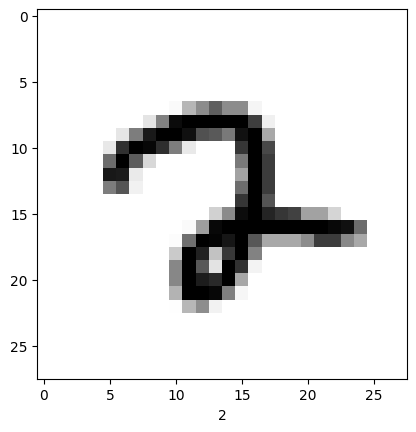

In [23]:
random_index = 8399
random_image = X_val[random_index]
random_image_reshaped = random_image.reshape(28, 28)

plt.imshow(random_image_reshaped, cmap = plt.cm.binary)
plt.grid(False)
plt.xlabel(y_val[random_index])
plt.show()